In [1]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

## 1. 지역별(시도,시군구) 병원분류

###  1.1 엑셀 -> csv 파일 확장자 변경

In [16]:
def convert_excel_to_csv(input_folder, output_folder):
    # 특정 폴더 내의 모든 Excel 파일을 찾습니다.(xlsx, xls 두개 확장자 모두 적용)
    excel_files = glob.glob(os.path.join(input_folder, '*.xls')) 

    # 각 Excel 파일을 CSV로 변환합니다.
    for excel_file in excel_files:
        # Excel 파일을 데이터프레임으로 읽어옵니다.
        df = pd.read_excel(excel_file)

        # CSV 파일로 저장합니다.
        csv_filename = os.path.splitext(os.path.basename(excel_file))[0] + '.csv'
        csv_path = os.path.join(output_folder, csv_filename)
        df.to_csv(csv_path, index=False)
        print(f'{excel_file} 변환 완료 -> {csv_path}')

# 입력 폴더와 출력 폴더를 지정합니다.
input_folder_path = "./Dataset/excel/"  # 입력 폴더 경로를 수정하세요.
output_folder_path = "./Dataset/"  # 출력 폴더 경로를 수정하세요.

# 폴더 내의 Excel 파일을 CSV로 변환합니다.
convert_excel_to_csv(input_folder_path, output_folder_path)

./Dataset/excel\컬럼정보_코드_서식구분코드.xls 변환 완료 -> ./Dataset/컬럼정보_코드_서식구분코드.csv
./Dataset/excel\컬럼정보_코드_종별코드.xls 변환 완료 -> ./Dataset/컬럼정보_코드_종별코드.csv
./Dataset/excel\컬럼정보_코드_지역코드.xls 변환 완료 -> ./Dataset/컬럼정보_코드_지역코드.csv
./Dataset/excel\컬럼정보_코드_진료과목코드.xls 변환 완료 -> ./Dataset/컬럼정보_코드_진료과목코드.csv
./Dataset/excel\컬럼정보_코드_표시과목코드.xls 변환 완료 -> ./Dataset/컬럼정보_코드_표시과목코드.csv


###  1.2 데이터 불러오기

In [54]:
data = pd.read_csv("./1.병원정보서비스.csv", encoding='utf-8')

### 1.3 데이터 지역별 그룹바이

In [55]:
# "시도코드"를 기준으로 데이터를 그룹화하고 "시군구코드명"의 개수를 세어줍니다.
groupby_data1 = data.groupby(["시도코드명","시군구코드명","종별코드명"]).size().reset_index(name="count")

In [56]:
groupby_data1

,시도코드명,시군구코드명,종별코드명,count
0,강원,강릉시,병원,1
1,강원,강릉시,보건소,1
2,강원,강릉시,보건지소,7
3,강원,강릉시,보건진료소,9
4,강원,강릉시,상급종합,1
...,...,...,...,...
2390,충북,충주시,종합병원,2
2391,충북,충주시,치과병원,1
2392,충북,충주시,치과의원,52
2393,충북,충주시,한방병원,2


### 1.4 데이터 시각화

In [60]:
# 그래프 폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\4003151886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\4003151886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\4003151886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\Ap

ValueError: num must be an integer with 1 <= num <= 6, not 7

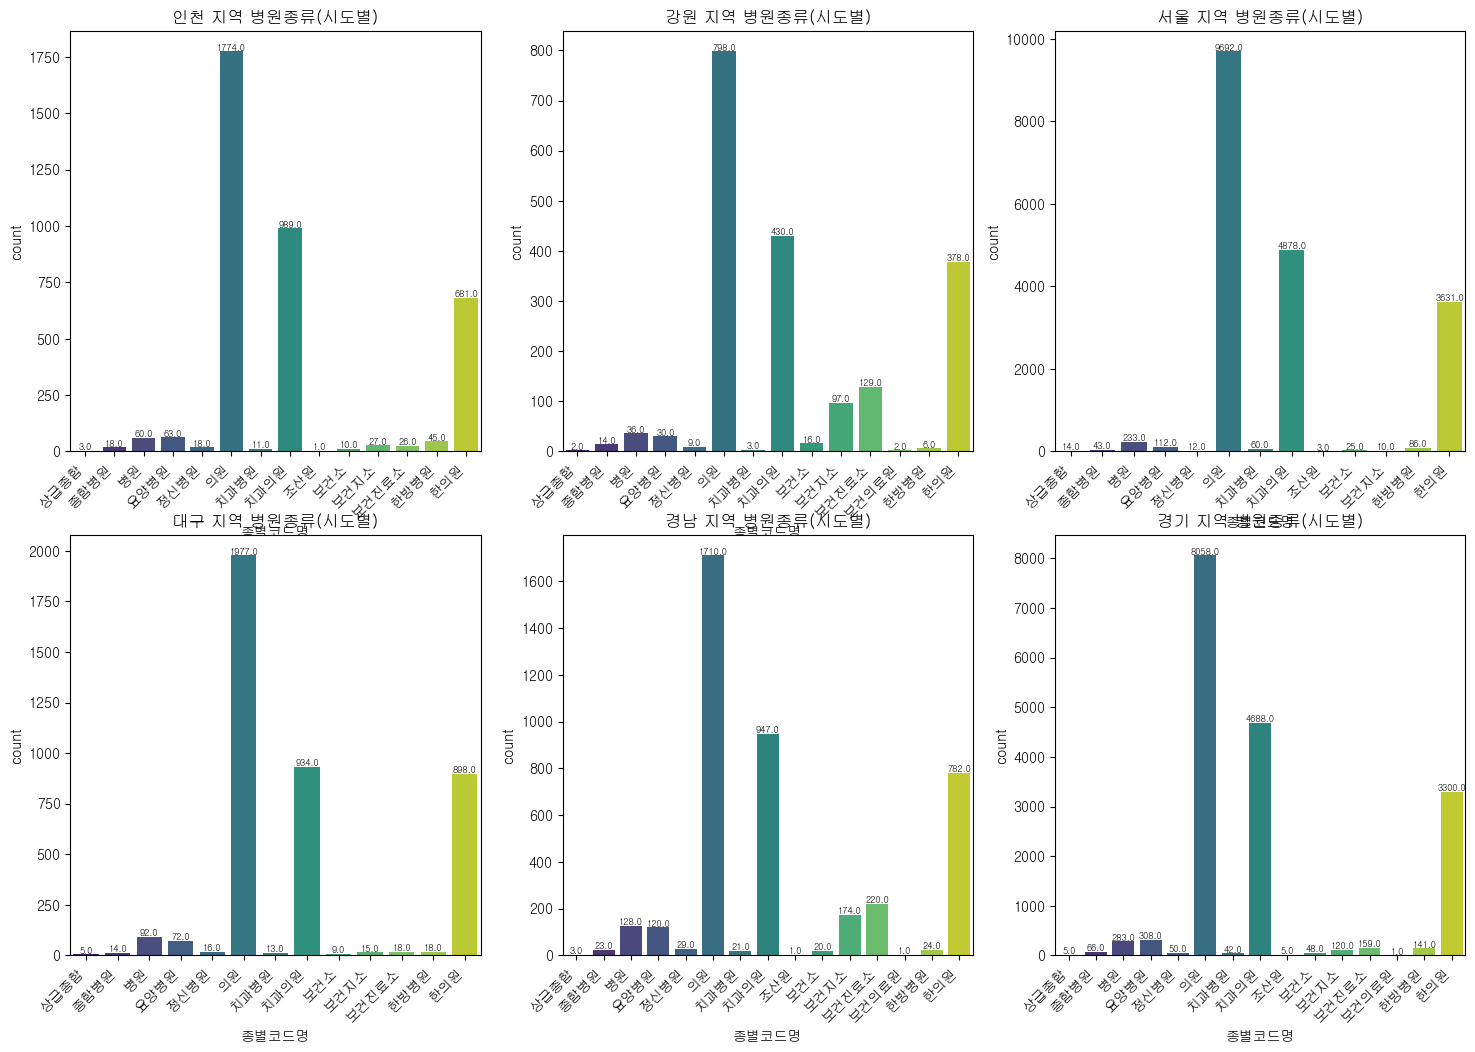

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(18, 12))

# 각 시도코드명별로 서브플롯을 생성하고 데이터를 필터링하여 막대 그래프를 그립니다.
for i, sido in enumerate(data['시도코드명'].unique()):
    plt.subplot(2, 3, i+1)  # 인덱스를 1부터 시작하도록 수정

    # 시도코드명에 해당하는 데이터를 필터링합니다.
    subset_data = data[data['시도코드명'] == sido]

    # 그룹화된 데이터를 기반으로 시군구코드명의 개수를 세어 막대 그래프를 그립니다.
    bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')

    # x축 레이블 회전 설정
    plt.xticks(rotation=45, ha="right")

    # 그래프의 제목 설정
    plt.title(f"{sido} 지역 병원종류(시도별)")

    # 숫자 넣는 부분
    for rect in bar.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=6.5)

# 그래프 레이아웃 조정
plt.tight_layout()


# 그래프 레이아웃 조정 (상하 간격 조절)
plt.subplots_adjust(hspace=0.5)

# 그래프 표시
plt.show()



C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\747382280.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\747382280.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\747382280.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppDa

ValueError: num must be an integer with 1 <= num <= 6, not 7

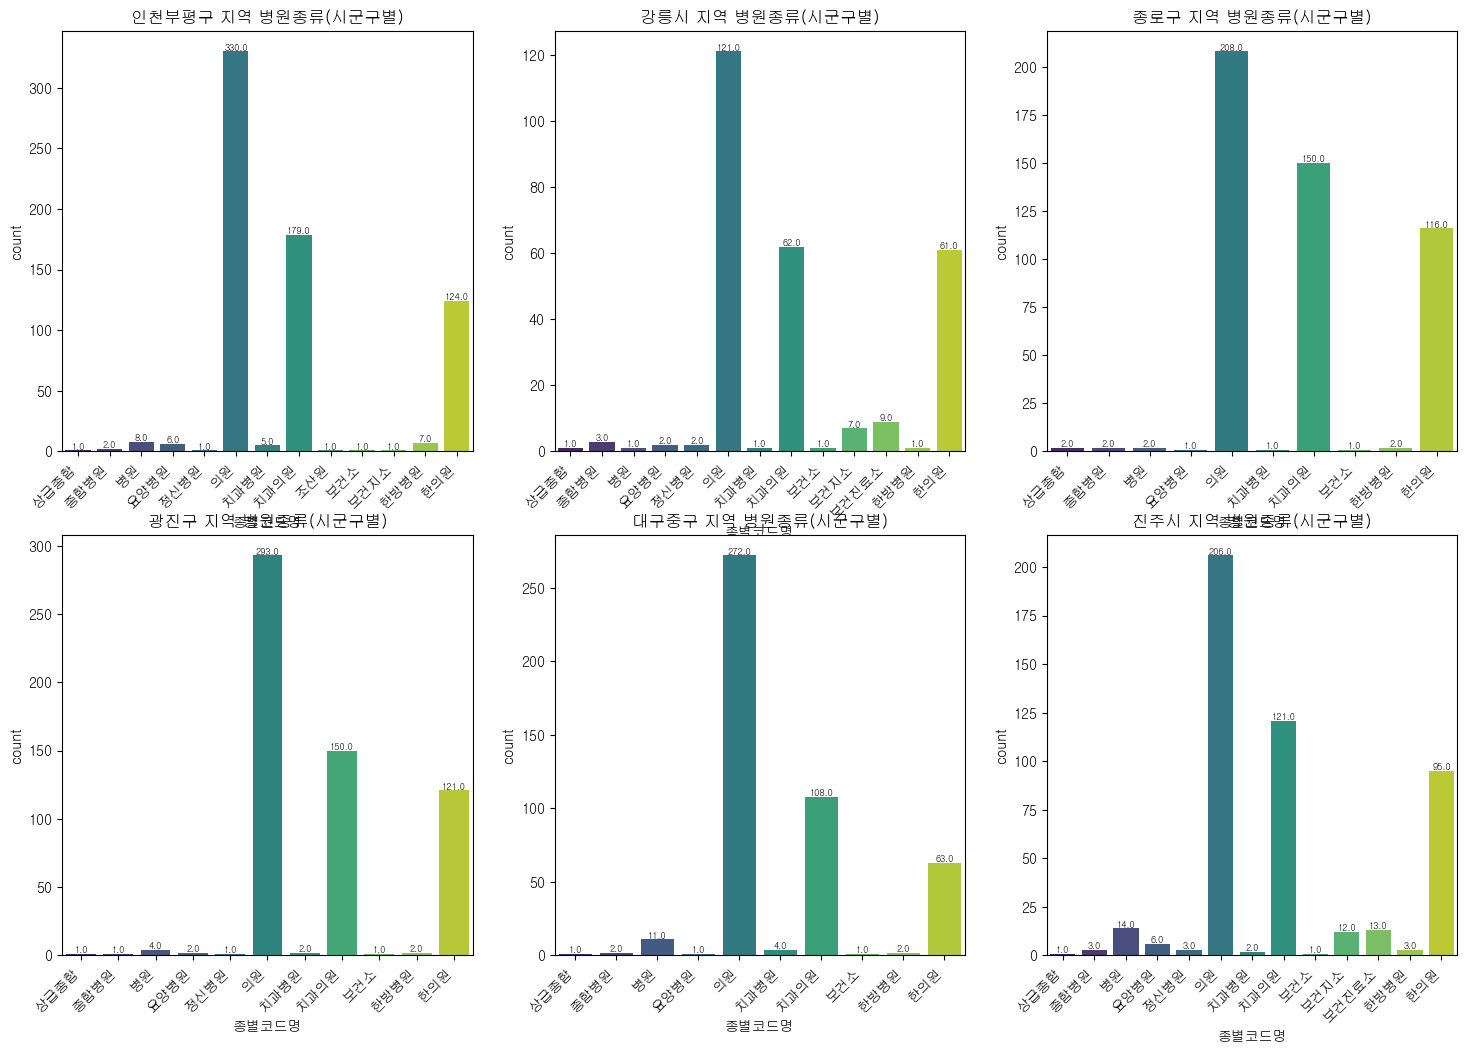

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(18, 12))

# 각 시도코드명별로 서브플롯을 생성하고 데이터를 필터링하여 막대 그래프를 그립니다.
for i, sido in enumerate(data['시군구코드명'].unique()):
    plt.subplot(2, 3, i+1)  # 인덱스를 1부터 시작하도록 수정

    # 시도코드명에 해당하는 데이터를 필터링합니다.
    subset_data = data[data['시군구코드명'] == sido]

    # 그룹화된 데이터를 기반으로 시군구코드명의 개수를 세어 막대 그래프를 그립니다.
    bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')

    # x축 레이블 회전 설정
    plt.xticks(rotation=45, ha="right")

    # 그래프의 제목 설정
    plt.title(f"{sido} 지역 병원종류(시군구별)")

    # 숫자 넣는 부분
    for rect in bar.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=6.5)

# 그래프 레이아웃 조정
plt.tight_layout()


# 그래프 레이아웃 조정 (상하 간격 조절)
plt.subplots_adjust(hspace=2)


# 그래프 표시
plt.show()


## 2. 지역별 진료과목 

### 2.1 지역 컬럼 추가(left merge)

In [95]:
df1 = pd.read_csv("./Dataset/5.의료기관별상세정보서비스_03_진료과목정보.csv", encoding='utf-8')

In [96]:
df1.head()

,암호화요양기호,요양기관명,진료과목코드,진료과목코드명,과목별 전문의수,선택진료 의사수
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 여의도성모병원,1,내과,38,0
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,내과,66,0
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,순천향대학교 부속 서울병원,1,내과,58,0
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,인제대학교 서울백병원,1,내과,0,0
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 은평성모병원,1,내과,49,0


In [99]:
df2 = pd.read_csv("./Dataset/1.병원정보서비스.csv", encoding='utf-8')
df2.head()                     

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,부평동,21431,...,0,0,2,0,0,0,0,0,126.724899,37.484831
1,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,NaN,25440,...,0,0,2,0,0,0,0,0,128.857841,37.818433
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,3181,...,0,0,4,0,0,0,0,0,126.967750,37.568408
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합,110000,서울,110023,광진구,NaN,5030,...,0,0,3,0,0,0,0,0,127.071828,37.540376
4,JDQ4MTYyMiM4MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경북대학교병원,1,상급종합,230000,대구,230006,대구중구,NaN,41944,...,0,0,1,0,0,0,0,0,128.604703,35.866253


In [100]:
df_merge = pd.merge(df1, df2, on = "암호화요양기호")

In [101]:
df_merge.head(2)

,암호화요양기호,요양기관명_x,진료과목코드,진료과목코드명,과목별 전문의수,선택진료 의사수,요양기관명_y,종별코드,종별코드명,시도코드,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 여의도성모병원,1,내과,38,0,가톨릭대학교 여의도성모병원,11,종합병원,110000,...,0,0,3,0,0,0,0,0,126.936752,37.518325
1,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 여의도성모병원,2,신경과,3,0,가톨릭대학교 여의도성모병원,11,종합병원,110000,...,0,0,3,0,0,0,0,0,126.936752,37.518325


In [102]:
df_merge.columns

Index(['암호화요양기호', '요양기관명_x', '진료과목코드', '진료과목코드명', '과목별 전문의수', '선택진료 의사수',
       '요양기관명_y', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드', '시군구코드명', '읍면동',
       '우편번호', '주소', '전화번호', '병원홈페이지', '개설일자', '총의사수', '의과일반의 인원수', '의과인턴 인원수',
       '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수', '치과인턴 인원수', '치과레지던트 인원수',
       '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수', '한방레지던트 인원수', '한방전문의 인원수',
       '조산사 인원수', '좌표(X)', '좌표(Y)'],
      dtype='object')

In [103]:
df_merge= df_merge.drop(df_merge.columns[[0,6]], axis=1)

In [104]:
df_merge.head()

,요양기관명_x,진료과목코드,진료과목코드명,과목별 전문의수,선택진료 의사수,종별코드,종별코드명,시도코드,시도코드명,시군구코드,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,가톨릭대학교 여의도성모병원,1,내과,38,0,11,종합병원,110000,서울,110013,...,0,0,3,0,0,0,0,0,126.936752,37.518325
1,가톨릭대학교 여의도성모병원,2,신경과,3,0,11,종합병원,110000,서울,110013,...,0,0,3,0,0,0,0,0,126.936752,37.518325
2,가톨릭대학교 여의도성모병원,3,정신건강의학과,6,0,11,종합병원,110000,서울,110013,...,0,0,3,0,0,0,0,0,126.936752,37.518325
3,가톨릭대학교 여의도성모병원,4,외과,10,0,11,종합병원,110000,서울,110013,...,0,0,3,0,0,0,0,0,126.936752,37.518325
4,가톨릭대학교 여의도성모병원,5,정형외과,8,0,11,종합병원,110000,서울,110013,...,0,0,3,0,0,0,0,0,126.936752,37.518325


### 2.2 지역별 진료과목 통계(그룹바이)

In [116]:
groupData = df_merge.groupby(["시도코드명","시군구코드명","진료과목코드명"]).size().reset_index(name="총합계")
groupData

,시도코드명,시군구코드명,진료과목코드명,총합계
0,강원,강릉시,가정의학과,22
1,강원,강릉시,결핵과,1
2,강원,강릉시,구강내과,18
3,강원,강릉시,구강병리과,13
4,강원,강릉시,구강악안면외과,20
...,...,...,...,...
10741,충북,충주시,한방소아과,41
10742,충북,충주시,한방신경정신과,33
10743,충북,충주시,한방안·이비인후·피부과,38
10744,충북,충주시,한방응급,3


### 2.3 데이터 시각화

In [118]:
# 그래프 폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3318097359.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3318097359.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3318097359.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\Ap

ValueError: num must be an integer with 1 <= num <= 6, not 7

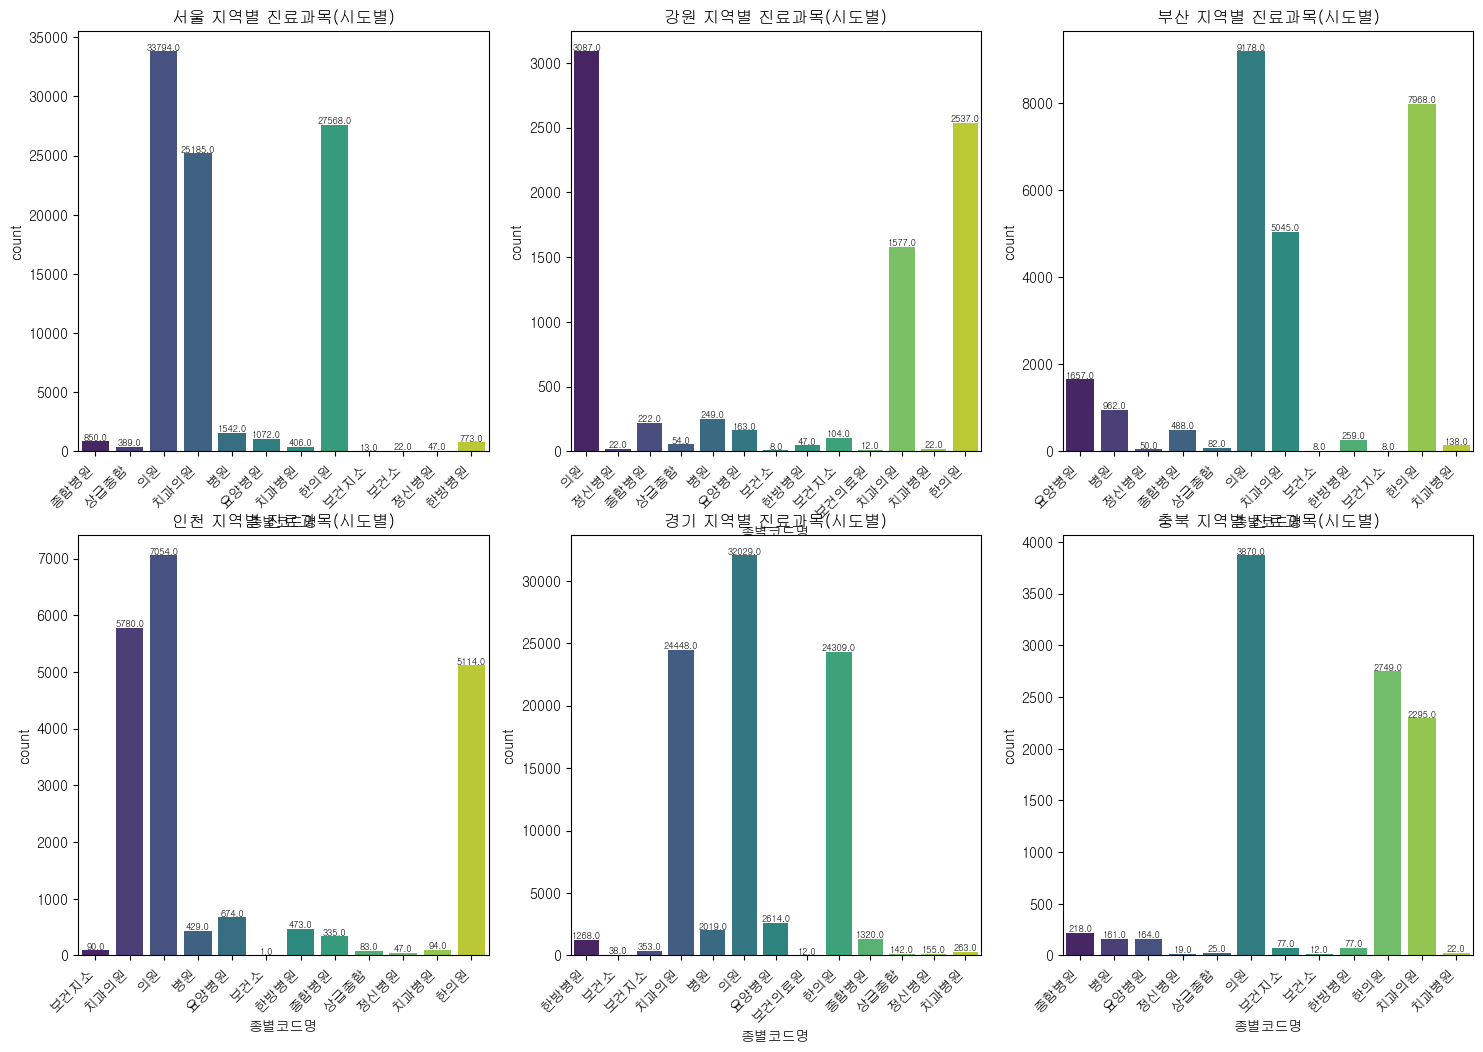

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(18, 12))

# 각 시도코드명별로 서브플롯을 생성하고 데이터를 필터링하여 막대 그래프를 그립니다.
for i, sido in enumerate(df_merge['시도코드명'].unique()):
    plt.subplot(2, 3, i+1)  # 인덱스를 1부터 시작하도록 수정

    # 시도코드명에 해당하는 데이터를 필터링합니다.
    subset_data = df_merge[df_merge['시도코드명'] == sido]

    # 그룹화된 데이터를 기반으로 시군구코드명의 개수를 세어 막대 그래프를 그립니다.
    bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')

    # x축 레이블 회전 설정
    plt.xticks(rotation=45, ha="right")

    # 그래프의 제목 설정
    plt.title(f"{sido} 지역별 진료과목(시별)")

    # 숫자 넣는 부분
    for rect in bar.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=6.5)

# 그래프 레이아웃 조정
plt.tight_layout()


# 그래프 레이아웃 조정 (상하 간격 조절)
plt.subplots_adjust(hspace=2)


# 그래프 표시
plt.show()


C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3656031491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3656031491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\AppData\Local\Temp\ipykernel_15844\3656031491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')
C:\Users\familidata\Ap

ValueError: num must be an integer with 1 <= num <= 6, not 7

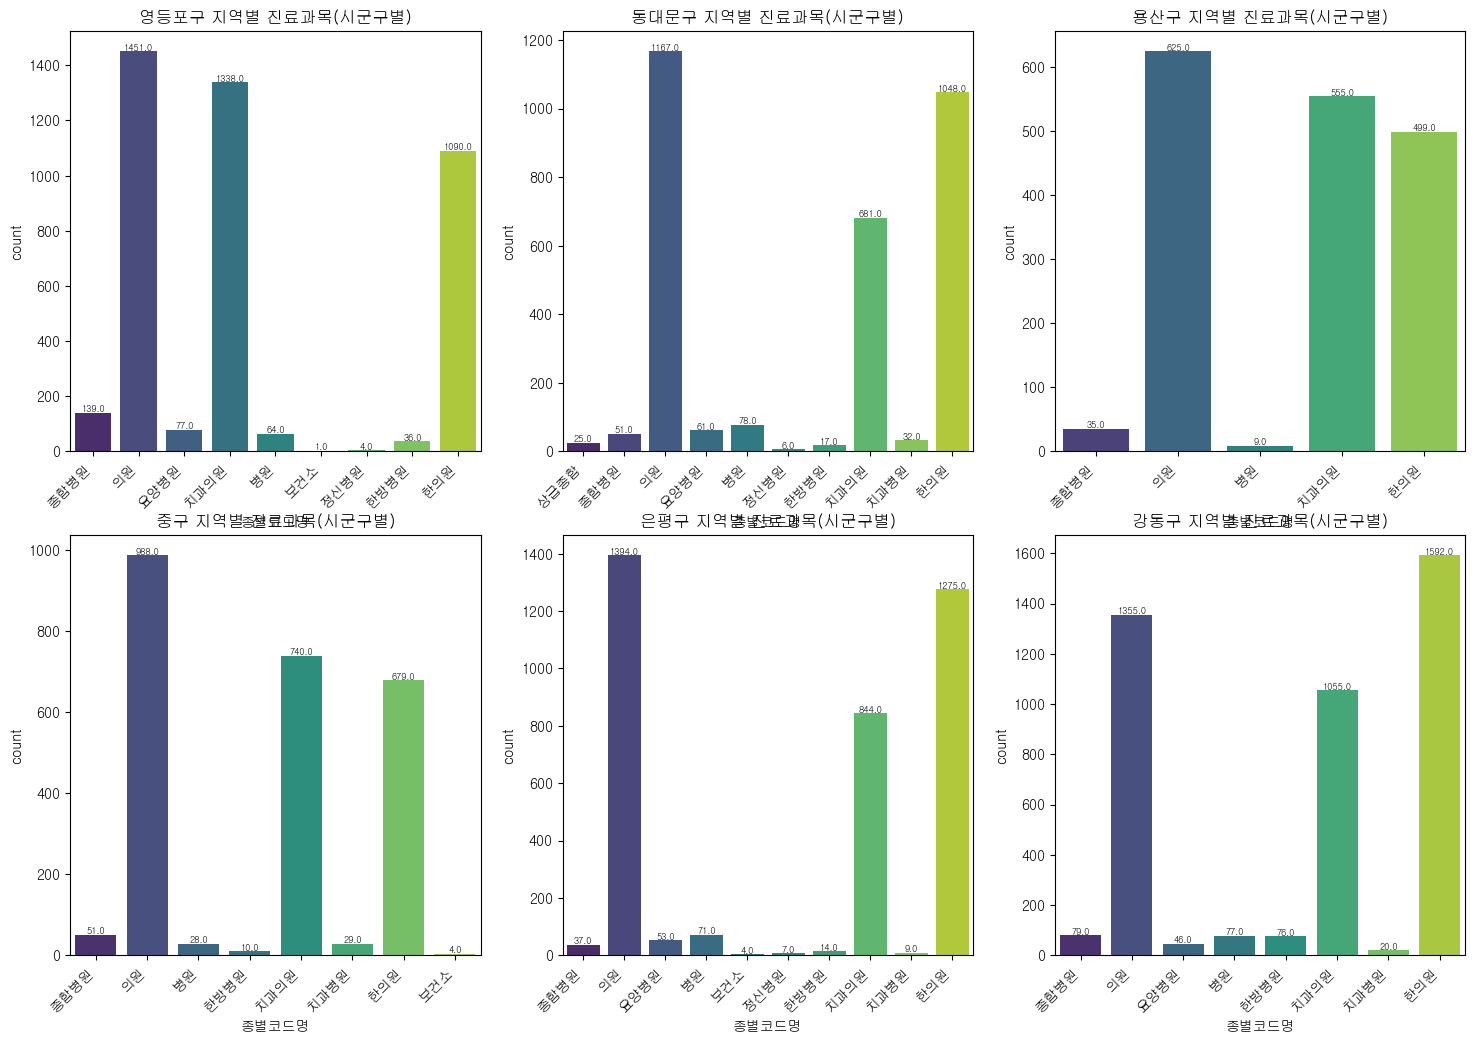

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 크기를 설정합니다.
plt.figure(figsize=(18, 12))

# 각 시도코드명별로 서브플롯을 생성하고 데이터를 필터링하여 막대 그래프를 그립니다.
for i, sido in enumerate(df_merge['시군구코드명'].unique()):
    plt.subplot(2, 3, i+1)  # 인덱스를 1부터 시작하도록 수정

    # 시도코드명에 해당하는 데이터를 필터링합니다.
    subset_data = df_merge[df_merge['시군구코드명'] == sido]

    # 그룹화된 데이터를 기반으로 시군구코드명의 개수를 세어 막대 그래프를 그립니다.
    bar = sns.countplot(x="종별코드명", data=subset_data, palette='viridis')

    # x축 레이블 회전 설정
    plt.xticks(rotation=45, ha="right")

    # 그래프의 제목 설정
    plt.title(f"{sido} 지역별 진료과목(시군구별)")

    # 숫자 넣는 부분
    for rect in bar.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=6.5)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 레이아웃 조정 (상하 간격 조절)
plt.subplots_adjust(left=3, bottom=3,  right=3, top=3, wspace=3, hspace=3)

# 그래프 표시
plt.show()